In [1]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

In [2]:
# Import data to Pandas DataFrame
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
test_final = pd.read_csv('data/test_final.csv')

X_train = train.drop('target', axis=1)
y_train = train['target']

X_test = test.drop('target', axis=1)
y_test = test['target']

X_test_final = test_final.drop('target', axis=1)
y_test_final = test_final['target']

# Preview data
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15986 entries, 0 to 15985
Data columns (total 27 columns):
acousticness          15986 non-null float64
danceability          15986 non-null float64
duration_ms           15986 non-null float64
energy                15986 non-null float64
instrumentalness      15986 non-null float64
liveness              15986 non-null float64
loudness              15986 non-null float64
mode_feat             15986 non-null float64
speechiness           15986 non-null float64
tempo                 15986 non-null float64
valence               15986 non-null float64
time_signature_1.0    15986 non-null int64
time_signature_3.0    15986 non-null int64
time_signature_4.0    15986 non-null int64
time_signature_5.0    15986 non-null int64
key_0.0               15986 non-null int64
key_1.0               15986 non-null int64
key_2.0               15986 non-null int64
key_3.0               15986 non-null int64
key_4.0               15986 non-null int64
key_5.0  

Performing Random Forest: 
1. We do not need to normalize data 
2. We need to somewhat balance the class distributions, we will do this using undersampling
3. 

## Create a tree classifier as a baseline 

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

tree_clf = DecisionTreeClassifier(criterion = "gini", max_depth = 5) 
tree_clf.fit(X_train, y_train)

pred = tree_clf.predict(X_train)
print(confusion_matrix(y_train, pred))
print(classification_report(y_train, pred))

[[  10  615  273  251   24  558  101  166]
 [   1 1171  380   70   15  537   24  308]
 [   0  369 1920   10   24  130    3  176]
 [   0  236   74  991   33  398   93   77]
 [   1  437  318  126   62  359   71  205]
 [   3  313   47  151   15 1081  128  109]
 [   4  308   69   98   25  522  215  110]
 [   4  377  275   13    6  503   43  950]]
              precision    recall  f1-score   support

           0       0.43      0.01      0.01      1998
           1       0.31      0.47      0.37      2506
           2       0.57      0.73      0.64      2632
           3       0.58      0.52      0.55      1902
           4       0.30      0.04      0.07      1579
           5       0.26      0.59      0.36      1847
           6       0.32      0.16      0.21      1351
           7       0.45      0.44      0.44      2171

    accuracy                           0.40     15986
   macro avg       0.40      0.37      0.33     15986
weighted avg       0.41      0.40      0.36     15986



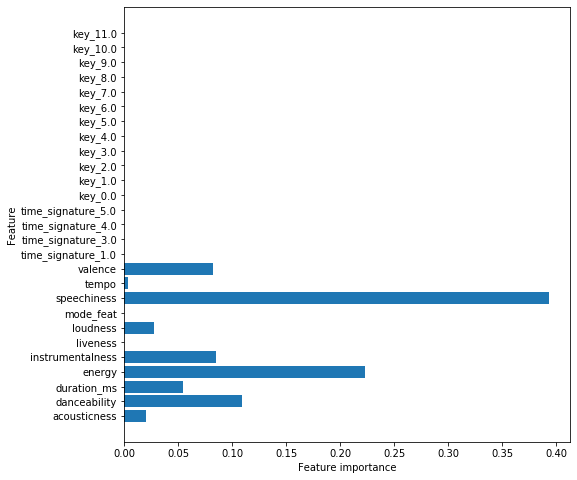

In [6]:
import matplotlib.pyplot as plt

def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances(tree_clf);

## Random Forest

In [7]:
classes = ['others','dancepop','poprap','folkpop', 'electropop','poprock', 'indiepop','popedm']

In [12]:
from sklearn.ensemble import RandomForestClassifier


forest = RandomForestClassifier(n_estimators=100, 
                                max_depth= 5, 
                                bootstrap=True,
                                oob_score=True,
                                n_jobs=-1,
                                random_state=11,
                                class_weight='balanced')
forest.fit(X_train, y_train)
forest.score(X_train, y_train)

pred_forest = forest.predict(X_train)
cm = confusion_matrix(y_train, pred_forest)
print(classification_report(y_train, pred_forest))


conf_matrix = pd.DataFrame(cm, index=['actual others',
                                      'actual dancepop',
                                      'actual poprap',
                                      'actual folkpop', 
                                      'actual electropop',
                                      'actual poprock',
                                      'actual indiepop',
                                      'actual popedm'],
                           columns= classes)
conf_matrix


              precision    recall  f1-score   support

           0       0.51      0.08      0.14      1998
           1       0.40      0.37      0.38      2506
           2       0.66      0.74      0.70      2632
           3       0.49      0.67      0.57      1902
           4       0.31      0.24      0.27      1579
           5       0.36      0.48      0.41      1847
           6       0.31      0.35      0.33      1351
           7       0.49      0.58      0.53      2171

    accuracy                           0.46     15986
   macro avg       0.44      0.44      0.42     15986
weighted avg       0.46      0.46      0.43     15986



,others,dancepop,poprap,folkpop,electropop,poprock,indiepop,popedm
actual others,166,356,230,402,129,336,184,195
actual dancepop,51,931,331,182,166,375,79,391
actual poprap,14,289,1955,39,91,68,16,160
actual folkpop,24,58,24,1282,97,220,145,52
actual electropop,17,198,158,244,372,143,216,231
actual poprock,25,149,35,278,86,879,267,128
actual indiepop,13,121,46,157,158,245,468,143
actual popedm,15,237,197,41,108,182,133,1258


In [13]:
# Print metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
def print_metrics(labels, preds):
   print("Precision Score: {}".format(precision_score(labels, preds, average='weighted')))
   print("Recall Score: {}".format(recall_score(labels, preds, average='weighted')))
   print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
   print("F1 Score: {}".format(f1_score(labels, preds, average='weighted')))
print_metrics(y_train, pred_forest)

Precision Score: 0.4574447510653472
Recall Score: 0.45733767046165397
Accuracy Score: 0.45733767046165397
F1 Score: 0.43387949363542067


In [14]:
test_forest = forest.predict(X_test)
print_metrics(y_test, test_forest)

Precision Score: 0.8556113832540283
Recall Score: 0.12079407806191117
Accuracy Score: 0.12079407806191117
F1 Score: 0.1225270433167756


## Grid Search for best parameters

In [34]:
from sklearn.model_selection import GridSearchCV

forest_GS = RandomForestClassifier(random_state = 11, 
                                   n_jobs=-1,
                                   oob_score=True)

# Set grid search params
param_grid_forest = [ 
  {'n_estimators': [200, 400],
   'criterion': ['entropy', 'gini'], 
   'max_depth': [4, 6, 8],  
   'min_samples_leaf':[0.05 ,0.1, 0.2],  
   'min_samples_split':[0.05 ,0.1, 0.2]
  }
]

# scoring = {#'accuracy':accuracy_score(), 
#            'precision':precision_score(y_test,pred_gs_rf, average='weighted')
#            #'f1_score':f1_score(average=weighted),
#            #'recall':recall_score(average=weighted)
# }

# Construct grid search
gs_rf = GridSearchCV(estimator=forest_GS,
            param_grid=param_grid_forest,
            scoring='accuracy',
            refit='accuracy',
            cv=3, verbose=2, return_train_score = True,
            n_jobs=-1)

# Fit using grid search
gs_rf.fit(X_train, y_train)

pred_gs_rf = gs_rf.predict(X_test)

# Best accuracy
print('Best accuracy: %.3f' % gs_rf.best_score_)

# Best params
print('\nBest params:\n', gs_rf.best_params_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:   43.8s
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  1.7min finished


Best accuracy: 0.416

Best params:
 {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 0.05, 'min_samples_split': 0.05, 'n_estimators': 200}
